In [1]:
import numpy as np

In [4]:
s = np.array([[[1,2],[4,5],[7,8]], [ [5,10,15], [6,12,18] ]   ])

In [5]:
s.shape

(2,)

In [10]:
from sklearn.datasets import load_sample_image

In [12]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype = np.float32)

batch_size , height, width, channels= dataset.shape

In [13]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [14]:
flower

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [15]:
china.shape

(427, 640, 3)

In [20]:
china[0]

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [250, 251, 255],
       [250, 251, 255],
       [250, 251, 255]], dtype=uint8)

In [16]:
flower.shape

(427, 640, 3)

In [17]:
dataset.shape

(2, 427, 640, 3)

In [25]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

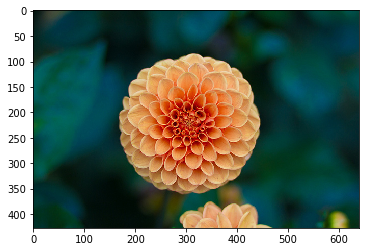

In [26]:
plt.imshow(flower)
plt.show()

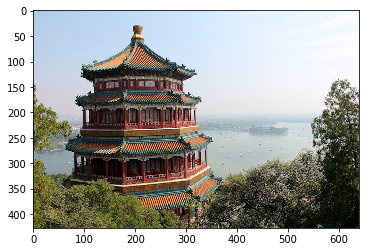

In [27]:
plt.imshow(china)
plt.show()

## 2개의 filter를 생성

In [21]:
filters = np.zeros(shape = (7,7, channels, 2) , dtype = np.float32)
filters[:, 3, :, 0] = 1  # 수직선
filters[3, :, :, 1] = 1  # 수평선 

## 입력 X와 2개의 필터를 적용한 ConvolutionLayer의 graph를 만듦.

In [ ]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides = [1,2,2,1], padding = "SAME")

with tf.Session() as sess :
    output = sess.run(convolution, feed_dict = {X : dataset})
plt.imshow( output[0, : , :, 1],cmap = "gray")  #첫 번째 image의 두 번째 특성 맵을 그림.
plt.show()

## tf.nn.conv2d()에 대한 설명

- X는 입력의 미니배치(4D tensor).
- filters는 적용될 일련의 filter(4D tensor).
- strides는 4개의 원소를 가진 1D 배열. 가운데 두 개의 원소는 수직, 수평 스트라이드 ($S_{h}$ 와 $S_{w}$)이고,    
  현재는 첫 번째와 마지막 원소가 1이어야 함. 언젠가 배치 stride(즉, 일부 샘플을 건너뛰기 위해)와          
  채널 stride(이전 층의 특성 맵이난 채널을 건너뛰기 위해)를 지정하는데 사용될지도 모름
- padding은 "VALID"와 "SAME" 중 하나를 지정.
- "VALID"로 지정하면 convolution layer에 zero padding을 사용하지 않음 ( 461p [그림 13-7]에 표현된 것처럼 
  stride에 따라 입력 image의 아래와 오른쪽 행과 열이 무시될 수 있음, 간단하게 표현하기 위해 여기서는 수평차원만 
  나타냈지만 같은 로직이 수직 차원에도 적용 )
- "SAME"으로 지정하면 convolution layer에 zero padding을 사용함. 이 경우 출력 뉴런 수는 입력 뉴런 수를 stride로 나누어 올림
  한 것과 같음. (여기서는 ceil(13/5) = 3)/  그리고 입력 데이터 주변에 가능한한 동일하게 0이 추가됨.

=> 이렇게 수동으로 filter를 만들었지만 실제 CNN에서 훈련 Algorithm이 최선의 filter를 자동으로 탐색을 함.   
&nbsp;&nbsp;&nbsp;&nbsp;   tensorflow에선 filter 변수를 (kernel이란 이름으로) 만들고 랜덤하게 초기화해주는 tf.layers.conv2d() 함수가 있음     
&nbsp;&nbsp;&nbsp;&nbsp;또한 편향 변수를 (bias란 이름으로) 만들고 0으로 초기화 함.    
&nbsp;&nbsp;&nbsp;&nbsp;예를 들어 다음 코드는 입력 placeholder를 만들고 그 다음에 7X7 특성 맵으로 2 x 2 stride(이 함수엔 수직, 수평 stride만 지정)와     
&nbsp;&nbsp;&nbsp;&nbsp;"SAME" padding을 사용해 convolution layer를 만듦

filter를 거치면 

이미지의 한 변의 크기를 n, 필터의 한 변의 크기를 f라고 한다면,

출력의 한 변의 크기는,

그런데 이렇게 된다면,

출력image의 크기는 $ (n-f+1) x (n-f+1) $ 

### padding의 필요성

대게 행렬의 가장자리에 있는 픽셀들은 중간에 있는 픽셀보다 적은 횟수로 필터가 걸린다.        
즉, 첫 번째로는 데이터의 손실이 생긴다. 두번째로는 이미지가 축소 된다는 단점   
    
이것을 padding을 사용하여 데이터 손실, 이미지축소의 두가지 단점을 모두 잡을 수 있다.
패딩해주는 값은 0으로 보통 채운다.

내가 p를 패딩의 양이라고 하면 이때 p = 1이다.

이제 패딩까지 추가하여 결과이미지의 크기를 예상해보면, $ (n +2p -f +1) x (n+2p-f+1)$ 이다.

padding의 option

1. Vaild

No Padding

p = 0

2. Same

방금같은 3x3 필터의 경우 p = 1 일 때 출력값과 입력값의 크기가 동일함

결론적으로 입력과 같은 크기의 출력을 갖게하는 패딩값

$(n+2p-f+1) = n   $        
$ p = \frac {f-1} {2} $    
       
       
거의 항상 필터는 홀수의 크기를 같고 있기 때문에

Padding은 정수값으로 떨어진다.

# 462p 맨 위부터

In [ ]:
X = tf.placeholder( shape = (None, height, width, channels), dtype = tf.float32)
conv = tf.layers.conv2d(X, filters = 2, kernel_size = 7, strides = [2,2],
                       padding = "SAME")

=> hyperparameter : filter 수, filter 높이, filter 너비, stride, padding 종류  
정확한 hyperparameter를 찾으려면 교차 검증을 사용해야 하지만 시간이 많이 걸림.   

### 13.3 Pooling Layer

In [ ]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "VALID")

with tf.Session() as sess :
    output = sess.run( max_pool, feed_dict = {X : dataset})
    
plt.imshow( output[0].astype(np.unit8)) # 첫 번째 image에 대한 출력을 그립니다.
plt.show()

ksize parameter에는 입력 tensor의 네 차원 [배치의 크기, 높이, 너비, 채널] 방향으로 커널의 크기를 지정.   
tensorflow는 현재 복수 개의 sample에 대한 pooling을 지원하지 않습니다.   
ksize의 첫 번째 원소는 반드시 1이어야 하고 공간 차원(높이와 너비)과 깊이 차원 양방향으로 풀링을 제공하지 않음.   
그러므로 ksize[1]과 ksize[2]가 1이거나 ksize[3]이 1이어야 함   

Average Pooling Layer(평균 풀링층)을 만들기 위해선 max_pool() 함수 대신 avg_pool() 함수를 사용하면 됨

미니배치의 크기를 줄이는 pooling은 할 수없음.   복수 개의 샘플에 대한 pooling을 하려면 tf.split()를 사용해 원하는 배치의 크기로 나누고 tf. reduce_max()를 사용해 분할된 배치에서 가장 큰 값을 추출한 다음이 값들을 다시 하나로 합쳐서 입력 tensor로사용 해야함.

깊이 방향 풀링을 하려면 입력 tensor의 채널(혹은 특성맵) 수가 pooling 크기( ksize[3])로 나누어 떨어져야 하며, 깊이 방향 strides의 크기(strides[3])가 풀링의 크기(ksize[3])와 같아야 함.

tf.layers.conv2d() 함수에 상응하는 tf.layers.max_pooling2d(),   tf.layers.average_pooling2d() 함수가 있음.   
이 함수들에서도 strides = [2,2]와 같이 수직, 수평 strides만 전달함.    
또한 tf.layers 하위 함수에서는 padding option을 소문자로입력가능